In [17]:
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dropout, Flatten, Input, Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
import pandas as pd
from time import time

In [18]:
#bases = ['asian', 'caucasian', 'african-american', 'hispanic', 'multiracial', 'nova_multiracial']
bases = ['nova_multiracial']
rede = 'VGG16'

In [20]:
from tensorflow.keras.applications import vgg16, vgg19, resnet, xception, inception_v3
img_rows = 150  
img_cols = 150

pre = vgg16.VGG16(weights = 'imagenet',
                 include_top = False,
                 input_shape = (img_rows, img_cols, 3))

for layer in pre.layers:
  layer.trainable = False




In [21]:
#HIPERPARAMETROS
train_batchsize = 18
val_batchsize = 20
epochs = 600
batch_size = 180

In [22]:
tempos = pd.Series()
for base in bases:

  

  train_data_dir = './dados/' + base + '_tratado'

  train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest',
        validation_split = 0.25)

#validation_datagen = ImageDataGenerator(rescale=1./255)




  train_generator = train_datagen.flow_from_directory(
          train_data_dir,
          target_size=(img_rows, img_cols),
          batch_size=train_batchsize,
          class_mode='categorical',
          subset='training')

  validation_generator = train_datagen.flow_from_directory(
          train_data_dir,
          target_size=(img_rows, img_cols),
          batch_size=val_batchsize,
          class_mode='categorical',
          shuffle=False,
          subset='validation')
  
  num_classes = validation_generator.num_classes


  inp = pre.output
  inp = GlobalAveragePooling2D()(inp)


  dense1 = Dense(512, activation= 'relu')(inp)
  dense1 = Dropout(0.5)(dense1)
  dense2 = Dense(64, activation= 'relu')(dense1)
  dense2 = Dropout(0.1)(dense2)

  out = Dense(num_classes, activation = 'softmax')(dense2)

  model = Model(pre.input, out)
  #model.compile(optimizer = Nadam(learning_rate = 0.0001) ,loss = 'categorical_crossentropy', metrics=['accuracy'])

  from tensorflow.keras.optimizers import RMSprop

  A = model.compile(loss = 'categorical_crossentropy',
                optimizer = RMSprop(learning_rate = 0.001),
                metrics = ['accuracy'])
  

  start = time()

  history = model.fit(
      train_generator,
      steps_per_epoch = train_generator.samples // batch_size,
      epochs = epochs,
      validation_data = validation_generator,
      validation_steps = validation_generator.samples // batch_size)
  
  tempos[base] = time() - start

  model.save('./Modelos/' + base + '_' + rede + '.h5')

  pd.DataFrame(history.history).to_csv('./out/' + base + '_' + rede + '.csv')


tempos.to_csv('./out/tempo_' + rede + '.csv')


<ipython-input-22-89546e410fa8>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  tempos = pd.Series()


Found 2027 images belonging to 235 classes.
Found 598 images belonging to 235 classes.
Epoch 1/600
11/11 [==============================] - 30s 3s/step - loss: 5.5367 - accuracy: 0.0101 - val_loss: 5.4885 - val_accuracy: 0.0000e+00
Epoch 2/600
11/11 [==============================] - 35s 3s/step - loss: 5.4726 - accuracy: 0.0152 - val_loss: 5.5144 - val_accuracy: 0.0000e+00
Epoch 3/600
11/11 [==============================] - 27s 3s/step - loss: 5.4649 - accuracy: 0.0051 - val_loss: 5.4651 - val_accuracy: 0.0000e+00
Epoch 4/600
11/11 [==============================] - 30s 3s/step - loss: 5.4384 - accuracy: 0.0101 - val_loss: 5.5070 - val_accuracy: 0.0000e+00
Epoch 5/600
11/11 [==============================] - 31s 3s/step - loss: 5.4726 - accuracy: 0.0105 - val_loss: 5.4733 - val_accuracy: 0.0000e+00
Epoch 6/600
11/11 [==============================] - 32s 3s/step - loss: 5.4319 - accuracy: 0.0152 - val_loss: 5.5332 - val_accuracy: 0.0000e+00
Epoch 7/600
11/11 [========================

11/11 [==============================] - 28s 3s/step - loss: 4.9478 - accuracy: 0.0314 - val_loss: 5.2315 - val_accuracy: 0.0000e+00
Epoch 57/600
11/11 [==============================] - 29s 3s/step - loss: 4.8910 - accuracy: 0.0404 - val_loss: 5.1924 - val_accuracy: 0.0000e+00
Epoch 58/600
11/11 [==============================] - 28s 3s/step - loss: 4.8481 - accuracy: 0.0455 - val_loss: 5.2368 - val_accuracy: 0.0167
Epoch 59/600
11/11 [==============================] - 29s 3s/step - loss: 4.8740 - accuracy: 0.0455 - val_loss: 5.1740 - val_accuracy: 0.0000e+00
Epoch 60/600
11/11 [==============================] - 28s 3s/step - loss: 4.7912 - accuracy: 0.0606 - val_loss: 5.2131 - val_accuracy: 0.0000e+00
Epoch 61/600
11/11 [==============================] - 29s 3s/step - loss: 4.8221 - accuracy: 0.0202 - val_loss: 5.2474 - val_accuracy: 0.0000e+00
Epoch 62/600
11/11 [==============================] - 28s 3s/step - loss: 4.8389 - accuracy: 0.0455 - val_loss: 5.1994 - val_accuracy: 0.0000

11/11 [==============================] - 28s 3s/step - loss: 4.0532 - accuracy: 0.1414 - val_loss: 4.4917 - val_accuracy: 0.0833
Epoch 114/600
11/11 [==============================] - 29s 3s/step - loss: 4.0804 - accuracy: 0.1010 - val_loss: 4.4767 - val_accuracy: 0.0833
Epoch 115/600
11/11 [==============================] - 28s 3s/step - loss: 4.0425 - accuracy: 0.1010 - val_loss: 4.4420 - val_accuracy: 0.0833
Epoch 116/600
11/11 [==============================] - 28s 3s/step - loss: 4.0243 - accuracy: 0.1465 - val_loss: 4.2928 - val_accuracy: 0.1167
Epoch 117/600
11/11 [==============================] - 29s 3s/step - loss: 4.0772 - accuracy: 0.1162 - val_loss: 4.2779 - val_accuracy: 0.1167
Epoch 118/600
11/11 [==============================] - 28s 3s/step - loss: 4.0750 - accuracy: 0.1257 - val_loss: 4.2635 - val_accuracy: 0.0667
Epoch 119/600
11/11 [==============================] - 28s 3s/step - loss: 3.9167 - accuracy: 0.1465 - val_loss: 4.3675 - val_accuracy: 0.1167
Epoch 120/600

11/11 [==============================] - 29s 3s/step - loss: 3.5193 - accuracy: 0.1919 - val_loss: 3.7006 - val_accuracy: 0.1667
Epoch 171/600
11/11 [==============================] - 28s 3s/step - loss: 3.3370 - accuracy: 0.2323 - val_loss: 3.8331 - val_accuracy: 0.1000
Epoch 172/600
11/11 [==============================] - 29s 3s/step - loss: 3.3433 - accuracy: 0.2525 - val_loss: 3.7399 - val_accuracy: 0.1667
Epoch 173/600
11/11 [==============================] - 29s 3s/step - loss: 3.4013 - accuracy: 0.1869 - val_loss: 3.6385 - val_accuracy: 0.1667
Epoch 174/600
11/11 [==============================] - 29s 3s/step - loss: 3.3566 - accuracy: 0.2071 - val_loss: 3.6672 - val_accuracy: 0.1167
Epoch 175/600
11/11 [==============================] - 28s 3s/step - loss: 3.2471 - accuracy: 0.2475 - val_loss: 3.7195 - val_accuracy: 0.1667
Epoch 176/600
11/11 [==============================] - 28s 3s/step - loss: 3.4215 - accuracy: 0.1990 - val_loss: 3.6603 - val_accuracy: 0.1167
Epoch 177/600

11/11 [==============================] - 29s 3s/step - loss: 2.8810 - accuracy: 0.2626 - val_loss: 3.4293 - val_accuracy: 0.2333
Epoch 228/600
11/11 [==============================] - 29s 3s/step - loss: 3.0642 - accuracy: 0.2273 - val_loss: 3.7439 - val_accuracy: 0.2333
Epoch 229/600
11/11 [==============================] - 28s 3s/step - loss: 2.9260 - accuracy: 0.2828 - val_loss: 3.2233 - val_accuracy: 0.2500
Epoch 230/600
11/11 [==============================] - 28s 3s/step - loss: 3.1531 - accuracy: 0.2273 - val_loss: 3.2178 - val_accuracy: 0.2500
Epoch 231/600
11/11 [==============================] - 29s 3s/step - loss: 3.2439 - accuracy: 0.2374 - val_loss: 3.3750 - val_accuracy: 0.1833
Epoch 232/600
11/11 [==============================] - 29s 3s/step - loss: 2.9529 - accuracy: 0.2576 - val_loss: 3.2507 - val_accuracy: 0.2500
Epoch 233/600
11/11 [==============================] - 28s 3s/step - loss: 3.0315 - accuracy: 0.2273 - val_loss: 3.3746 - val_accuracy: 0.2167
Epoch 234/600

11/11 [==============================] - 28s 3s/step - loss: 2.5841 - accuracy: 0.3788 - val_loss: 3.1124 - val_accuracy: 0.2500
Epoch 285/600
11/11 [==============================] - 28s 3s/step - loss: 2.5713 - accuracy: 0.3333 - val_loss: 3.0321 - val_accuracy: 0.2500
Epoch 286/600
11/11 [==============================] - 28s 3s/step - loss: 2.7855 - accuracy: 0.3081 - val_loss: 3.0056 - val_accuracy: 0.3000
Epoch 287/600
11/11 [==============================] - 30s 3s/step - loss: 2.8649 - accuracy: 0.2576 - val_loss: 3.1374 - val_accuracy: 0.2833
Epoch 288/600
11/11 [==============================] - 28s 3s/step - loss: 2.7844 - accuracy: 0.3384 - val_loss: 3.1789 - val_accuracy: 0.3167
Epoch 289/600
11/11 [==============================] - 28s 3s/step - loss: 2.7775 - accuracy: 0.3081 - val_loss: 3.2672 - val_accuracy: 0.2667
Epoch 290/600
11/11 [==============================] - 28s 3s/step - loss: 2.5839 - accuracy: 0.3131 - val_loss: 2.9626 - val_accuracy: 0.3667
Epoch 291/600

11/11 [==============================] - 31s 3s/step - loss: 2.7305 - accuracy: 0.3384 - val_loss: 3.0466 - val_accuracy: 0.2333
Epoch 342/600
11/11 [==============================] - 32s 3s/step - loss: 2.3842 - accuracy: 0.3434 - val_loss: 3.0773 - val_accuracy: 0.2167
Epoch 343/600
11/11 [==============================] - 31s 3s/step - loss: 2.1584 - accuracy: 0.4394 - val_loss: 2.8190 - val_accuracy: 0.2500
Epoch 344/600
11/11 [==============================] - 32s 3s/step - loss: 2.4348 - accuracy: 0.3283 - val_loss: 2.9938 - val_accuracy: 0.2333
Epoch 345/600
11/11 [==============================] - 32s 3s/step - loss: 2.4689 - accuracy: 0.3283 - val_loss: 3.0614 - val_accuracy: 0.2333
Epoch 346/600
11/11 [==============================] - 33s 3s/step - loss: 2.6151 - accuracy: 0.3434 - val_loss: 2.9919 - val_accuracy: 0.2500
Epoch 347/600
11/11 [==============================] - 31s 3s/step - loss: 2.5033 - accuracy: 0.3232 - val_loss: 3.0462 - val_accuracy: 0.2500
Epoch 348/600

11/11 [==============================] - 30s 3s/step - loss: 2.4839 - accuracy: 0.3384 - val_loss: 2.6053 - val_accuracy: 0.3167
Epoch 399/600
11/11 [==============================] - 33s 3s/step - loss: 2.4915 - accuracy: 0.3485 - val_loss: 2.7254 - val_accuracy: 0.3167
Epoch 400/600
11/11 [==============================] - 34s 3s/step - loss: 2.1796 - accuracy: 0.4495 - val_loss: 2.7021 - val_accuracy: 0.3167
Epoch 401/600
11/11 [==============================] - 34s 3s/step - loss: 2.5492 - accuracy: 0.3333 - val_loss: 2.7499 - val_accuracy: 0.2833
Epoch 402/600
11/11 [==============================] - 34s 3s/step - loss: 2.3945 - accuracy: 0.3717 - val_loss: 2.5278 - val_accuracy: 0.3333
Epoch 403/600
11/11 [==============================] - 34s 3s/step - loss: 2.4080 - accuracy: 0.3939 - val_loss: 2.6006 - val_accuracy: 0.4000
Epoch 404/600
11/11 [==============================] - 34s 3s/step - loss: 2.1351 - accuracy: 0.3979 - val_loss: 2.5280 - val_accuracy: 0.3833
Epoch 405/600

11/11 [==============================] - 30s 3s/step - loss: 2.2727 - accuracy: 0.4040 - val_loss: 2.4828 - val_accuracy: 0.3000
Epoch 456/600
11/11 [==============================] - 30s 3s/step - loss: 2.2108 - accuracy: 0.3990 - val_loss: 2.4356 - val_accuracy: 0.2833
Epoch 457/600
11/11 [==============================] - 29s 3s/step - loss: 2.1398 - accuracy: 0.4949 - val_loss: 2.7067 - val_accuracy: 0.2667
Epoch 458/600
11/11 [==============================] - 30s 3s/step - loss: 2.1912 - accuracy: 0.3788 - val_loss: 2.7723 - val_accuracy: 0.2500
Epoch 459/600
11/11 [==============================] - 29s 3s/step - loss: 2.2035 - accuracy: 0.4495 - val_loss: 2.3124 - val_accuracy: 0.3333
Epoch 460/600
11/11 [==============================] - 30s 3s/step - loss: 1.9751 - accuracy: 0.4495 - val_loss: 2.6072 - val_accuracy: 0.3333
Epoch 461/600
11/11 [==============================] - 29s 3s/step - loss: 2.4335 - accuracy: 0.3788 - val_loss: 2.5342 - val_accuracy: 0.3333
Epoch 462/600

11/11 [==============================] - 29s 3s/step - loss: 1.9003 - accuracy: 0.4596 - val_loss: 2.6514 - val_accuracy: 0.2833
Epoch 513/600
11/11 [==============================] - 30s 3s/step - loss: 2.2627 - accuracy: 0.4242 - val_loss: 2.4421 - val_accuracy: 0.4167
Epoch 514/600
11/11 [==============================] - 29s 3s/step - loss: 2.1616 - accuracy: 0.3939 - val_loss: 2.6123 - val_accuracy: 0.3333
Epoch 515/600
11/11 [==============================] - 29s 3s/step - loss: 2.1282 - accuracy: 0.4444 - val_loss: 2.8006 - val_accuracy: 0.2833
Epoch 516/600
11/11 [==============================] - 29s 3s/step - loss: 1.9985 - accuracy: 0.4697 - val_loss: 2.7599 - val_accuracy: 0.2833
Epoch 517/600
11/11 [==============================] - 29s 3s/step - loss: 2.0492 - accuracy: 0.4596 - val_loss: 2.9102 - val_accuracy: 0.3000
Epoch 518/600
11/11 [==============================] - 28s 3s/step - loss: 2.1650 - accuracy: 0.4293 - val_loss: 2.7078 - val_accuracy: 0.3333
Epoch 519/600

11/11 [==============================] - 29s 3s/step - loss: 1.9924 - accuracy: 0.4192 - val_loss: 2.3755 - val_accuracy: 0.4333
Epoch 570/600
11/11 [==============================] - 28s 3s/step - loss: 1.9865 - accuracy: 0.4545 - val_loss: 2.2506 - val_accuracy: 0.4000
Epoch 571/600
11/11 [==============================] - 29s 3s/step - loss: 1.9450 - accuracy: 0.4899 - val_loss: 2.2202 - val_accuracy: 0.4833
Epoch 572/600
11/11 [==============================] - 29s 3s/step - loss: 2.0690 - accuracy: 0.4192 - val_loss: 2.7009 - val_accuracy: 0.3833
Epoch 573/600
11/11 [==============================] - 29s 3s/step - loss: 2.2193 - accuracy: 0.4192 - val_loss: 2.3708 - val_accuracy: 0.4000
Epoch 574/600
11/11 [==============================] - 28s 3s/step - loss: 2.0363 - accuracy: 0.4697 - val_loss: 2.2776 - val_accuracy: 0.4167
Epoch 575/600
11/11 [==============================] - 29s 3s/step - loss: 1.9733 - accuracy: 0.5051 - val_loss: 1.9964 - val_accuracy: 0.5000
Epoch 576/600

In [14]:
asian = pd.read_csv('./out/asian_Xception.csv')
asian.head()

,Unnamed: 0,loss,accuracy,val_loss,val_accuracy
0,0,4.218432,0.000000,3.947205,0.000
1,1,4.102115,0.000000,3.923988,0.075
2,2,4.097882,0.015873,3.890425,0.000
3,3,3.937972,0.023810,3.897376,0.050
4,4,3.945709,0.039683,3.819308,0.125


<AxesSubplot:>

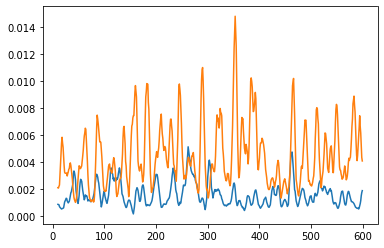

In [32]:
asian['accuracy'].rolling(7).var().rolling(5).mean().plot()
asian['val_accuracy'].rolling(7).var().rolling(5).mean().plot()

